# **Tugas Besar Strategi Algoritma**
#### **Analisis Perbandingan Metode Greedy Dan Dynamic Programming Pada Coin Change problem**

Oleh :
1.   Hanvito Michael Lee - 1301194024
2.   Kurniadi Ahmad Wijaya - 1301194024
3.   Naufal Haritsah Lutfi - 1301194024

Beberapa source:
- https://www.slideshare.net/Khadizamariatushi/coin-change-greedy-vs-dynamic-programming

### **Deskripsi Tugas**

Masalah  optimasi  merupakan  masalah untuk  mencari solusi  optimum. 
Salah satu dari masalah optimasi adalah persoalan penukaran uang atau coin change. Dimana persoalan ini membahas tentang bagaimana cara agar dapat menukar uang dengan nilai yang sama namun dengan jumlah uang yang lebih sedikit dari berbagai satuan. Contohnya ketika kita ingin menukarkan uang Rp 1.500 dengan uang 100, 200, 500 maupun 1000. Untuk menyelesaikan persoalan penukaran uang dapat digunakan beberapa algoritma. Untuk mengetahui algoritma yang paling baik, dilakukan analisis terhadap tiga algoritma pemecahan masalah yaitu Brute Force, Greedy, dan Dynamic Programming.

### **Analisis Kompleksitas Algoritma**

#### **Metode Greedy**

Secara harfiah, greedy berarti rakus atau tamak. Algoritma Greedy merupakan algoritma sederhana yang paling populer untuk pemecahan persoalan optimasi seperti halnya coin change.
Ilustrasi Coin Change Problem menggunakan metode Greedy :

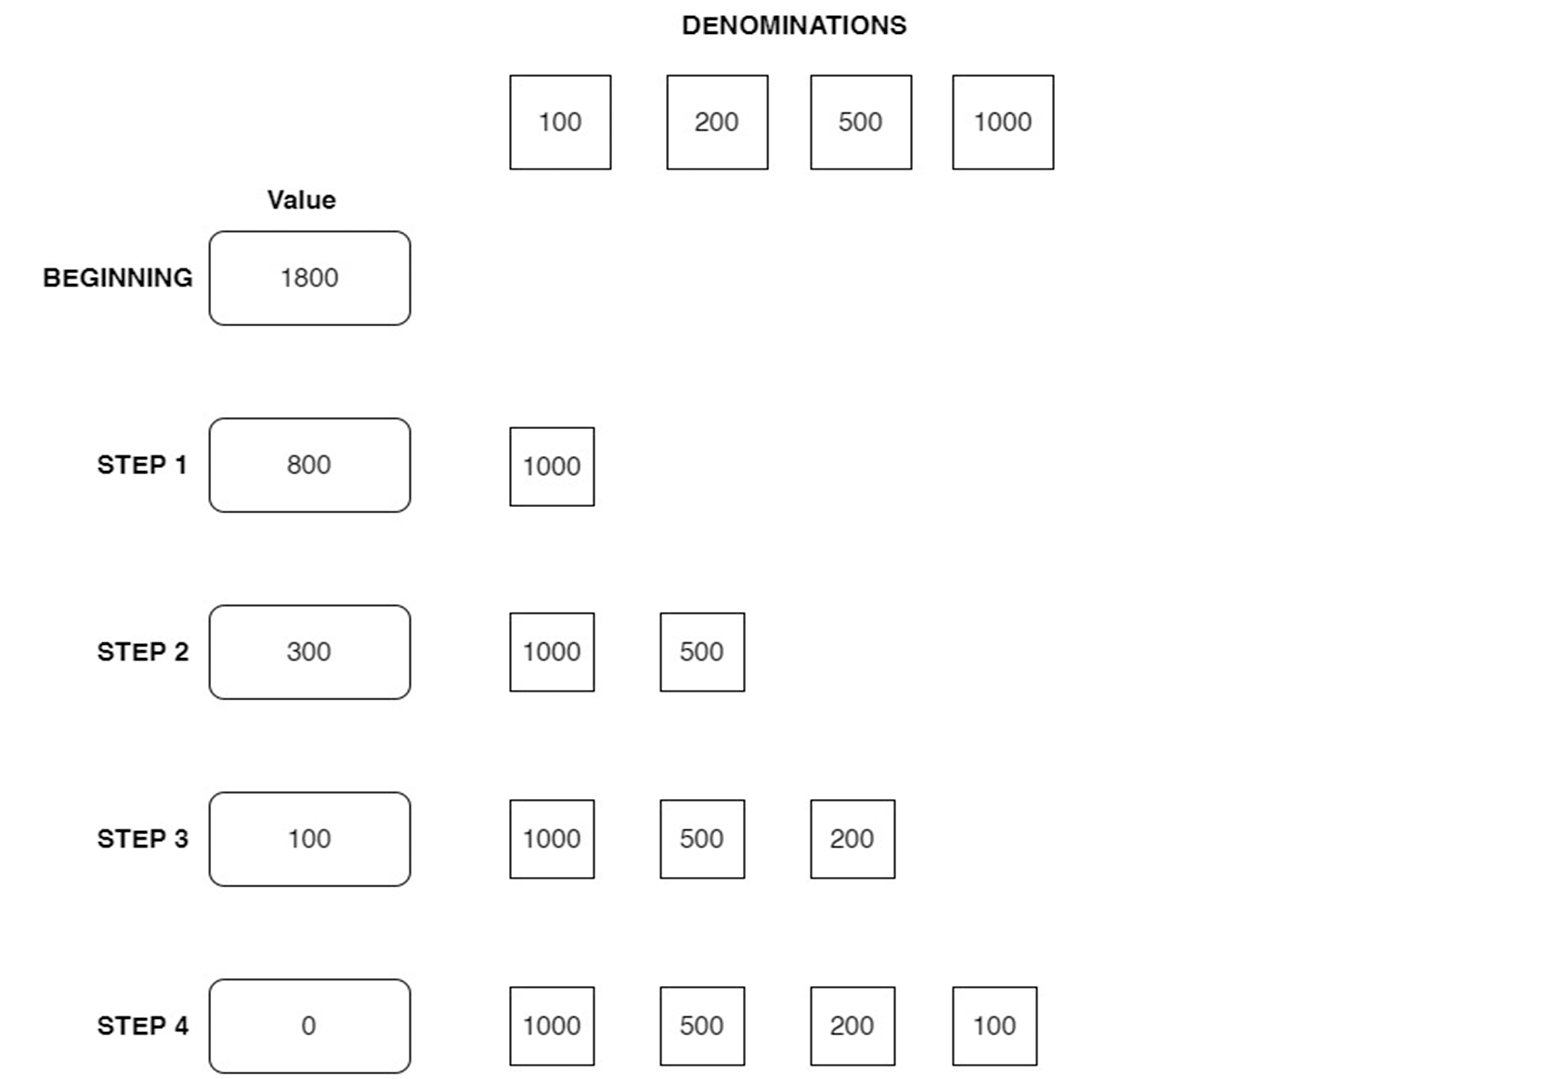

Perhitungan Big-O ( Worst Case Scenario )
Untuk Algoritma Greedy, untuk perulangan while akan memiliki Big-O sebesar O(n) karena akan melakukan perulangan sebanyak n kali. Dan untuk perulangan for akan memiliki Big-O sebesar O(m) dimana m akan bernilai berapa banyak coins untuk pengganti nilai n yang digunakan. Untuk perhitungan Kompleksitasnya sebagai berikut :



\begin{align}
A(n) &= \sum_{i=1}^{n} \sum_{i=1}^{m} 2
\\
A(n) &= 2 \sum_{i=1}^{n} \sum_{i=1}^{m} 1
\\
A(n) &= 2 \sum_{i=1}^{n} m + 1 - 1
\\
A(n) &= 2(m + \sum_{i=1}^{n} 1)
\\
A(n) &= 2 (m + n +1 - 1)
\\
A(n) &= 2(m + n)
\end{align}


#### **Notasi Asimtotik Worst Case Scenario**

\begin{align}
T(n) = 2(m + n) \in O(n), n > m
\\
\\
\end{align}

####  **Metode Dynamic Programming**

Dynamic Programming adalah metode pemecahan masalah dengan cara menguraikan solusi menjadi sekumpulan langkah (step) atau tahapan (stage) sedemikian sehingga solusi dari persoalan dapat dipandang dari serangkaian keputusan yang saling berkaitan. Ilustrasi Coin Change menggunakan metode Dynamic Programming :

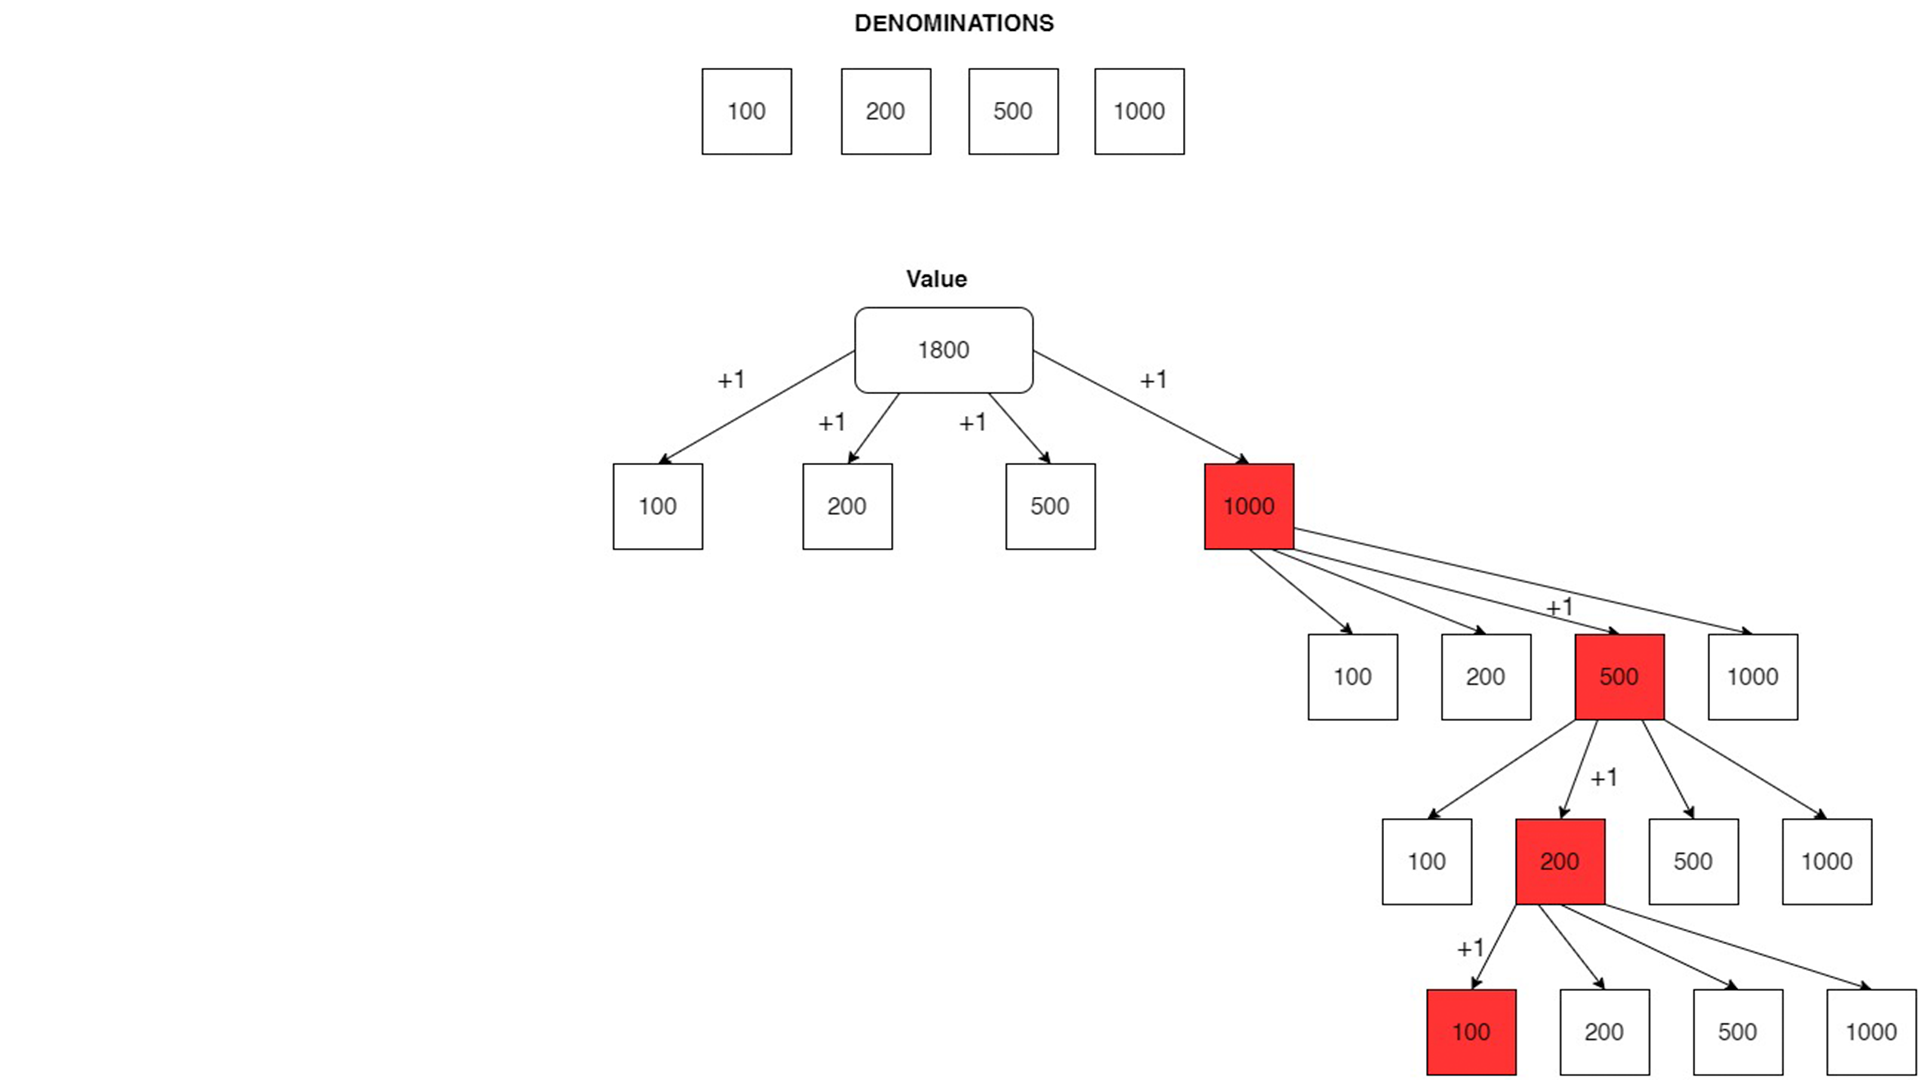

**Perhitungan Big-O ( Worst Case Scenario )**


\begin{align}
A(n) &= \sum_{i=1}^{n} \sum_{i=1}^{m} 2 + \sum_{i=1}^{n}1
\\
A(n) &= 2 (\sum_{i=1}^{n} \sum_{i=1}^{m} 1) + n + 1 - 1
\\
A(n) &= 2 (\sum_{i=1}^{n} m + 1 - 1) + n
\\
A(n) &= 2(m + \sum_{i=1}^{n} 1) + n
\\
A(n) &= 2 (m + n +1 - 1) + n
\\
A(n) &= 2(m + n) + n
\\
A(n) &= 2m + 2n + n
\\
A(n) &= 2m + 3n
\end{align}


**Notasi Asimtotik Worst Case Scenario**

\begin{align}
T(n) = 2m + 3n \in O(n), n > m
\\
\\
\end{align}

###  **Implementasi Kode**

#### **Metode Greedy**

In [1]:
def brute_force(coins, money):
    i = 0
    changes = []
    
    while money != 0 :
        if i < len(coins) :
            if money - coins[i] >= 0 :
                money -= coins[i]
                changes.append(coins[i])
            else :
                i += 1

    return changes 

In [2]:
def greedy(coins, money):
    changes = []

    while money != 0:
          change = 0

          for coin in coins: 
              if money - coin >= 0 and change < coin:
                 change = coin
            
          changes.append(change)
          money -= change
    
    return changes

#### **Metode Dynamic Programming**

In [3]:
def dynamic_programming(coins, money):
    total = money
    coin_values = coins
    coin_count = [0]*(total+1)
    used_coins = [0]*(total+1)

    for cents in range(total+1):
        count = cents
        coin = 1

        for coin_value in coin_values:
            if coin_value <= cents and coin_count[cents-coin_value] + 1 < count:
               count = coin_count[cents-coin_value] + 1
               coin = coin_value

            coin_count[cents] = count
            used_coins[cents] = coin

    result = []
    coin = total

    while coin > 0:
        used = used_coins[coin]
        result.append(used)
        coin = coin - used  # Backtrack

    return result

### **Analisis Metode**

In [4]:
import timeit

def calculate(start): 
    stop = timeit.default_timer()
    execution_time = stop - start
    return round(execution_time, 6)

##### **Inisialisasi Variabel Coin Dan Jumlah Penukaran Uang**

In [5]:
coins = [5000, 2500, 500, 200, 70, 30, 15]
money = [2200, 3500, 5500, 7600, 8570, 9945]

##### **Inisialisasi Fungsi Perhitungan Waktu Eksekusi**

In [6]:
m_time = []

def count_time(coins, money, method, name):
    for i, money in enumerate(money):
        start = timeit.default_timer()
        print(f'Hasil Iterasi Uang {money}: {method(coins, money)}')
        m_time.append([name, money, calculate(start)])

##### **Perhitungan Koin**

In [19]:
count_time(coins, money, brute_force, 'Brute Force')

Hasil Iterasi Uang 2200: [500, 500, 500, 500, 200]
Hasil Iterasi Uang 3500: [2500, 500, 500]
Hasil Iterasi Uang 5500: [5000, 500]
Hasil Iterasi Uang 7600: [5000, 2500, 70, 30]
Hasil Iterasi Uang 8570: [5000, 2500, 500, 500, 70]
Hasil Iterasi Uang 9945: [5000, 2500, 500, 500, 500, 500, 200, 200, 30, 15]


In [20]:
count_time(coins, money, greedy, 'Greedy')

Hasil Iterasi Uang 2200: [500, 500, 500, 500, 200]
Hasil Iterasi Uang 3500: [2500, 500, 500]
Hasil Iterasi Uang 5500: [5000, 500]
Hasil Iterasi Uang 7600: [5000, 2500, 70, 30]
Hasil Iterasi Uang 8570: [5000, 2500, 500, 500, 70]
Hasil Iterasi Uang 9945: [5000, 2500, 500, 500, 500, 500, 200, 200, 30, 15]


In [21]:
count_time(coins, money, dynamic_programming, 'Dynamic Programming')

Hasil Iterasi Uang 2200: [500, 500, 500, 500, 200]
Hasil Iterasi Uang 3500: [2500, 500, 500]
Hasil Iterasi Uang 5500: [5000, 500]
Hasil Iterasi Uang 7600: [5000, 2500, 70, 30]
Hasil Iterasi Uang 8570: [5000, 2500, 500, 500, 70]
Hasil Iterasi Uang 9945: [5000, 2500, 500, 500, 500, 500, 200, 200, 30, 15]


##### **Hasil Waktu Eksekusi**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

m_time = pd.DataFrame(m_time, columns =['Method', 'Money', 'Time']) 
m_time

,Method,Money,Time
0,Brute Force,2200,0.001527
1,Brute Force,3500,0.000501
2,Brute Force,5500,0.000503
3,Brute Force,7600,0.000723
4,Brute Force,8570,0.000418
5,Brute Force,9945,0.000430
6,Greedy,2200,0.000114
7,Greedy,3500,0.000032
8,Greedy,5500,0.000026
9,Greedy,7600,0.000029


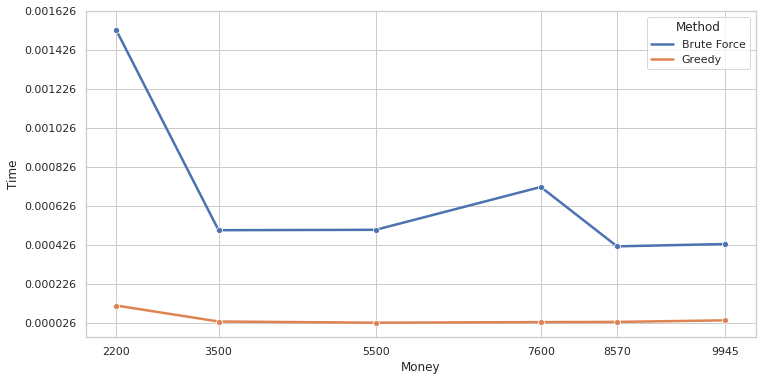

In [23]:
range = len(money)*3-len(money)

plt.figure(figsize=(12, 6))
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")
sns.lineplot(data=m_time[:range], x='Money', y='Time', hue='Method', marker="o", palette="deep", ci=None)

plt.yticks(np.arange(min(m_time['Time']), max(m_time[:range]['Time'])+0.0002, 0.0002))
plt.xticks(money)
plt.show()

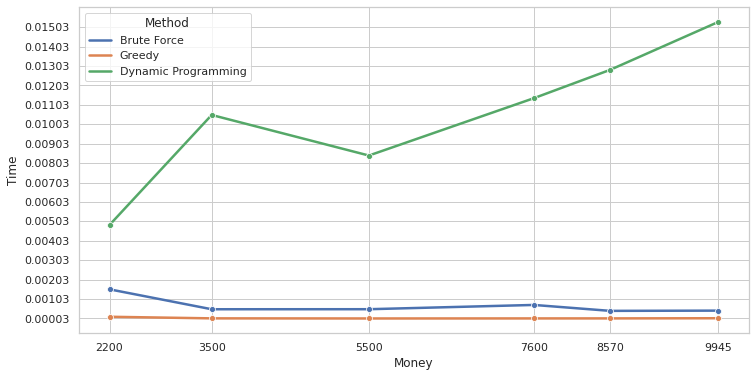

In [24]:
plt.figure(figsize=(12, 6))
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")
sns.lineplot(data=m_time, x=m_time['Money'], y=m_time['Time'], hue=m_time['Method'], marker="o", palette="deep", ci=None)

plt.yticks(np.arange(min(m_time['Time']), max(m_time['Time'])+0.0005, 0.001))
plt.xticks(money)
plt.show()